# Introduction


This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The main qeustion we are trying to answer here is why 30% of patients miss their scheduled appointment. We are trying to predict the most important factors that affect the atendance of the patient.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data Wrangling


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.isna().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
df.duplicated().sum()


0

Correct Incosistencies in Data
Below we will correct some of the inconsistencies in the data:

PatientId is an Integer and AppointmentID is Float , but both don't have any numerical values they should be string but i will igonre them and drop them .
Data Type of ScheduledDay and AppointmentDay will be changed to DateTime.
Typo's in the Column names will be corrected
As the AppointmentDay has 00:00:00 in it's TimeStamp, we will ignore it.
As we removed the Time from AppointmentDay's TimeStamp we will do a similar thing for ScheduledDay also. (Ideally the Time in AppointmentDay column will help us better rather than in the ScheduledDay)
there's row with Age = -1 which not make sense .

In [9]:
# change type of PatientId
df.drop(['PatientId','AppointmentID'],axis=1,inplace= True)
# convert ScheduledDay and AppointmentDay into datetime 
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

# Rename incorrect column names.
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 
                        'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [10]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
cols = df.columns 
cat_col = [col for col in cols if col not in ['ScheduledDay','AppointmentDay'] ]
cat_col

['Gender',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow']

In [12]:
for col in  cat_col :
    print("Unique Values in {} : {} ".format(col,df[col].unique()))
    print('-------------------------------------------------------------------------------------------------')

Unique Values in Gender : ['F' 'M'] 
-------------------------------------------------------------------------------------------------
Unique Values in Age : [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1] 
-------------------------------------------------------------------------------------------------
Unique Values in Neighbourhood : ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' '

In [13]:
df[df['Age']==-1]


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [14]:
df[df['Age']==0]


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
59,F,2016-04-29,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
63,M,2016-04-27,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,M,2016-04-25,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,M,2016-04-27,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
67,F,2016-04-29,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110345,F,2016-05-16,2016-06-01,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,M,2016-06-06,2016-06-08,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,F,2016-06-03,2016-06-03,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,F,2016-06-03,2016-06-03,0,RESISTÊNCIA,0,0,0,0,0,0,No


It's seem that the row with Age -1 is wrong and we can remove it
3539 rows with age = 0 seems that it blongs to babies with little months age and we can assume that from rows we can see they don't have any Scholarship or Hypertension or Diabetes or Alcoholism or Handicap

In [15]:
df = df[df['Age'] >=0]


In [16]:
df["Age_bins"] = pd.qcut(df.Age, 5, labels = ["0 - 12", "13 - 29", "30 - 44", "45 - 58", "59 - 115"])


In [17]:
df['WaitingTime'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days


In [18]:
df['ScheduledDay_DOW'] = df['ScheduledDay'].dt.day_name()
df['AppointmentDay_DOW'] = df['AppointmentDay'].dt.day_name()

In [19]:
df.tail()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,Age_bins,WaitingTime,ScheduledDay_DOW,AppointmentDay_DOW
110522,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,45 - 58,35,Tuesday,Tuesday
110523,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,45 - 58,35,Tuesday,Tuesday
110524,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,13 - 29,41,Wednesday,Tuesday
110525,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,30 - 44,41,Wednesday,Tuesday
110526,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,45 - 58,41,Wednesday,Tuesday


# EDA


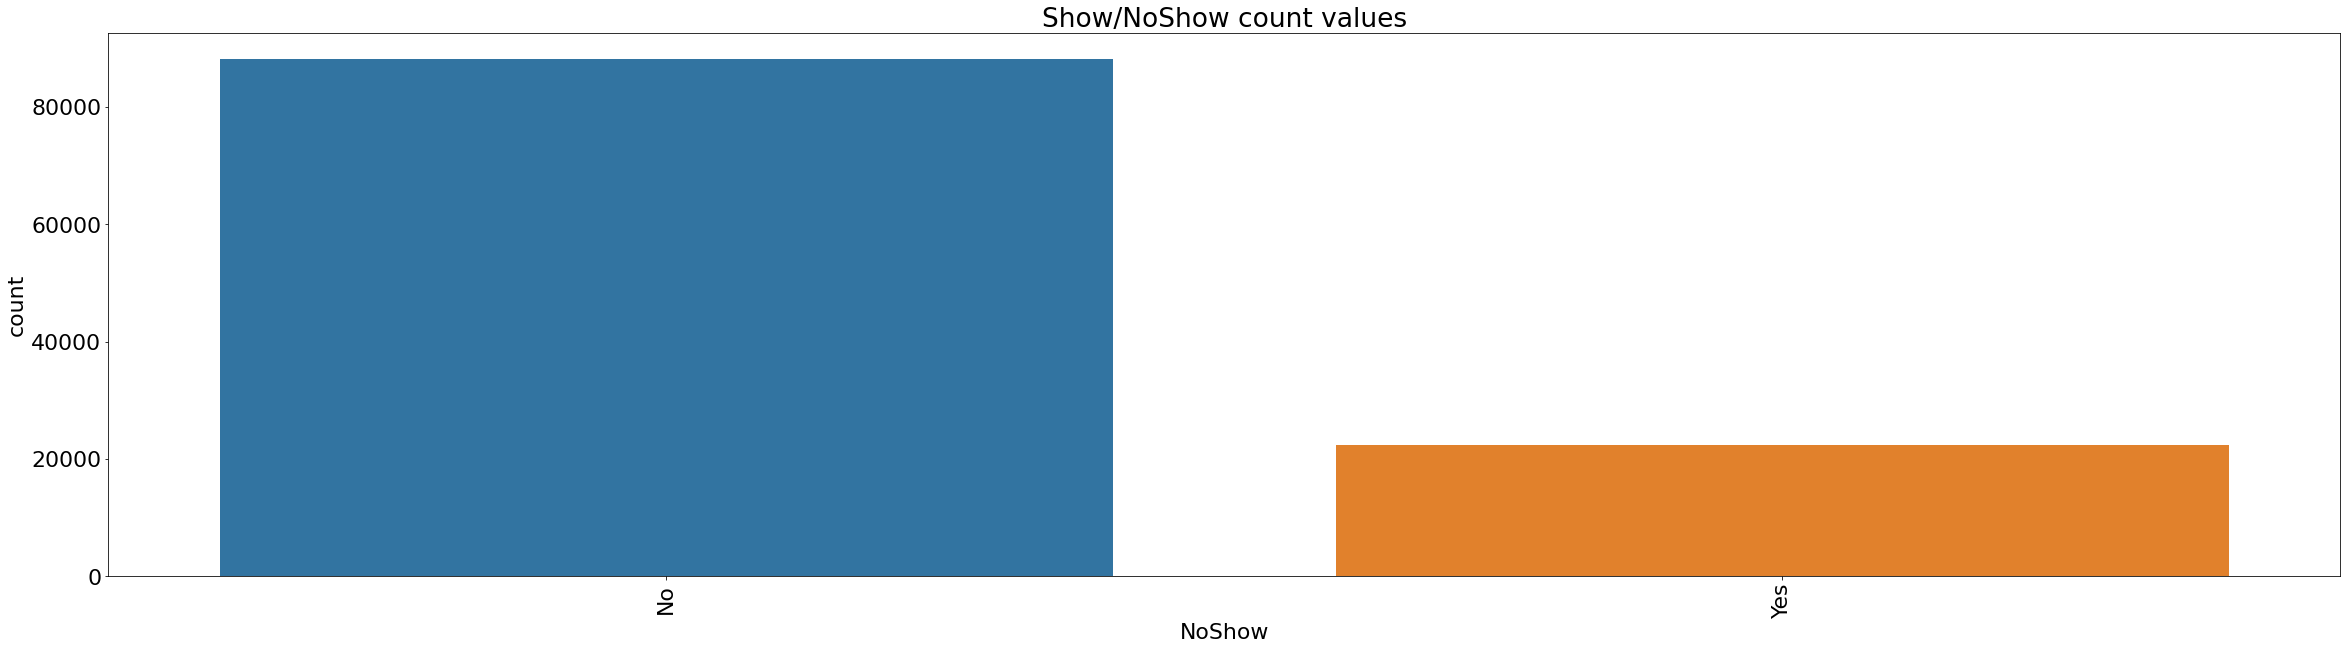

In [20]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(40,10))
plt.xticks(rotation=90)
sns.countplot(x=df.NoShow)
plt.title("Show/NoShow count values")
plt.show()

# 1. Does the Age has an affect the Appointment ?


<AxesSubplot:>

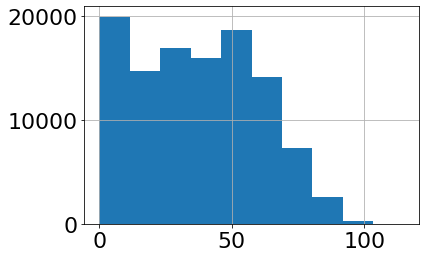

In [21]:
df['Age'].hist()


<AxesSubplot:>

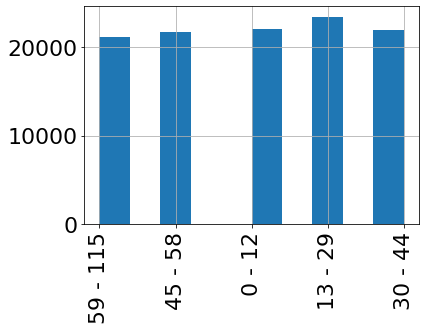

In [22]:
plt.xticks(rotation=90)
df["Age_bins"].hist()

<AxesSubplot:>

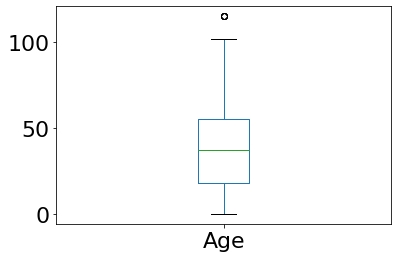

In [23]:
df['Age'].plot(kind='box')


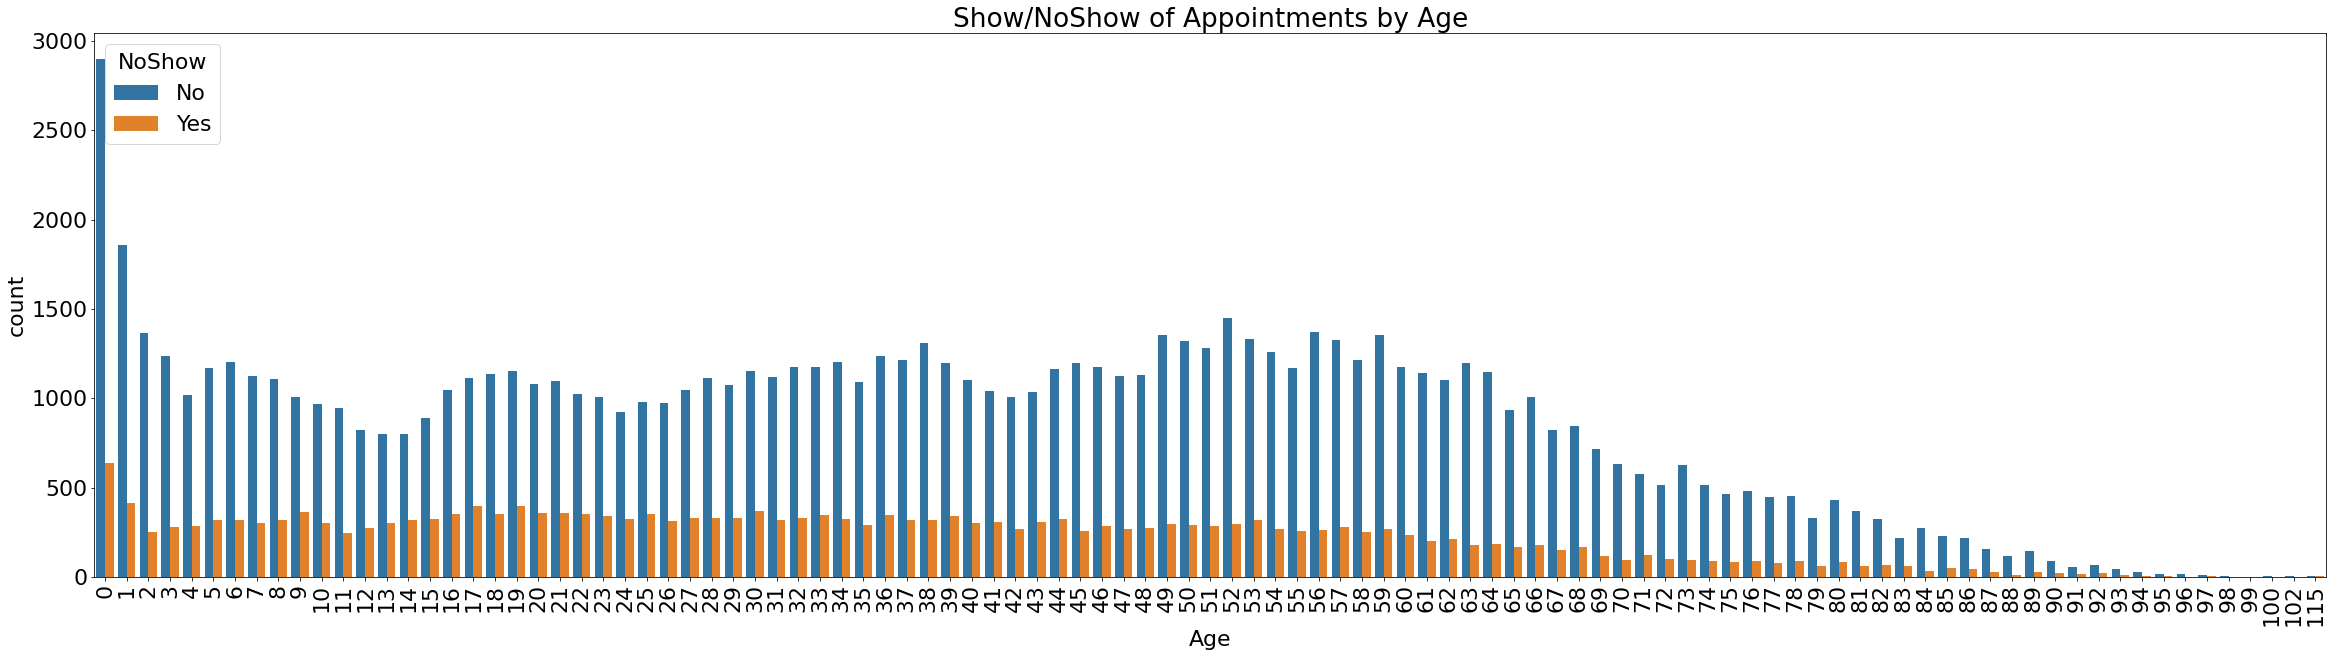

In [24]:
plt.figure(figsize=(40,10))
plt.xticks(rotation=90)
sns.countplot(x=df.Age, hue=df.NoShow)
plt.title("Show/NoShow of Appointments by Age")
plt.show()

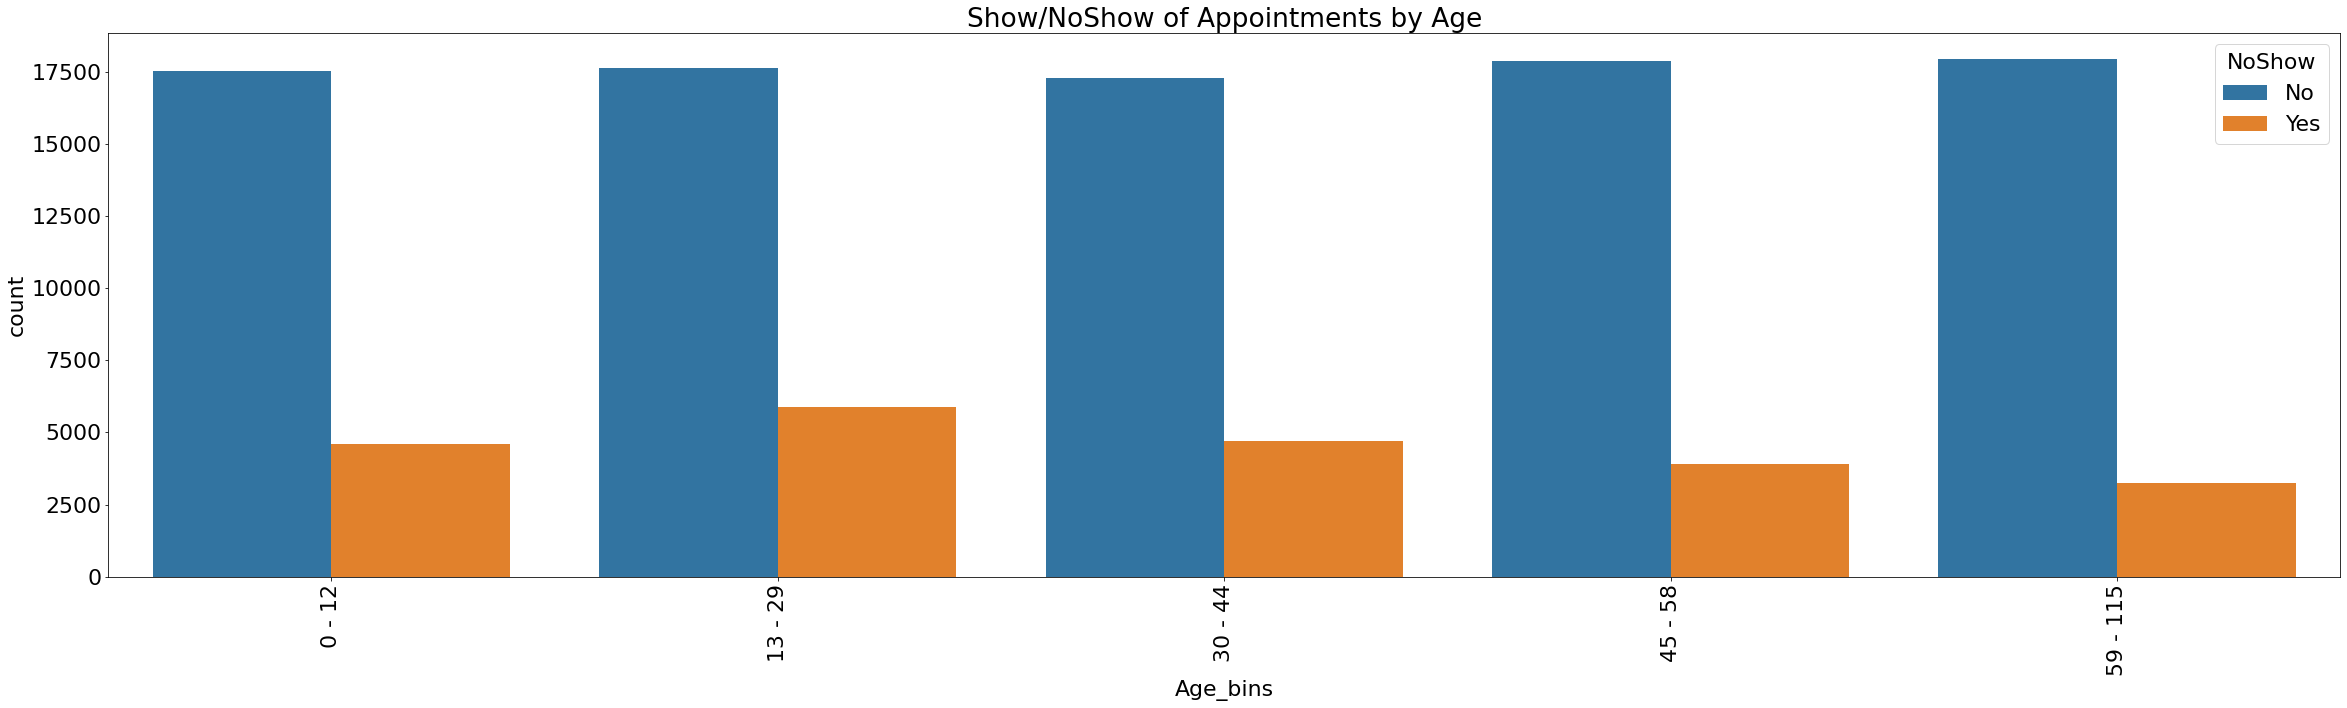

In [25]:
plt.figure(figsize=(40,10))
plt.xticks(rotation=90)
sns.countplot(x=df.Age_bins, hue=df.NoShow)
plt.title("Show/NoShow of Appointments by Age")
plt.show()

.the median is a 37 and the box plot is between 18 to 55

.age 0 and 1 is the most values in the dataset and they affect on the show that 0 and 1 most of them attend the Appointment but looking to other values we can't say that show affect by age

.all Age bins almost have same number of show , bin 13-29 have the greatest number in not attend

# 2- Does the Hypertension has an affect the Appointment 

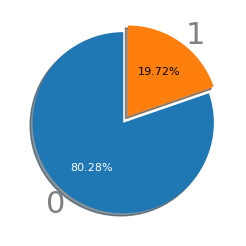

In [27]:
values = df.Hypertension.value_counts()
labels = df.Hypertension.value_counts().index 

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

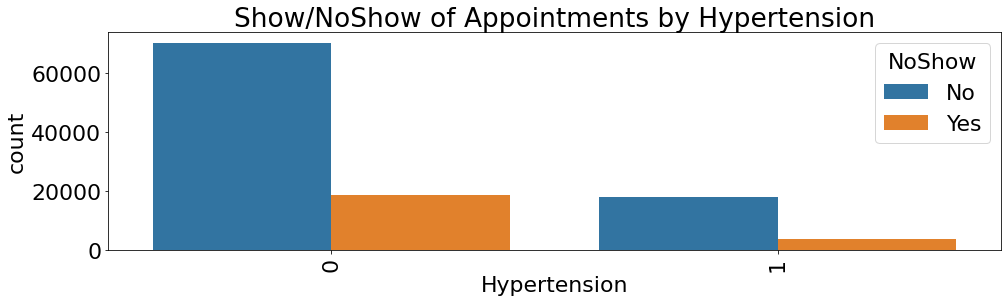

In [28]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.countplot(x=df.Hypertension, hue=df.NoShow)
plt.title("Show/NoShow of Appointments by Hypertension")
plt.show()

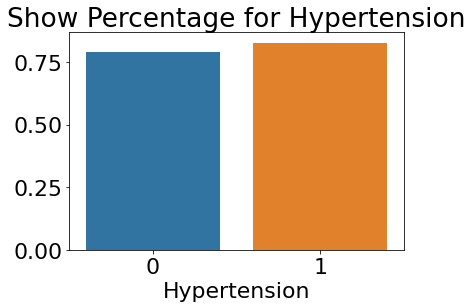

In [29]:
ratio = df[df.NoShow == 'No'].groupby(['Hypertension']).size()/df.groupby(['Hypertension']).size()
sns.barplot(x=ratio.index, y=ratio)
plt.title("Show Percentage for Hypertension")
plt.show()


.From the above visualization we can see that there are around 80% of patients without Hypertension and out of them around 70000 have come for the visit.

.Out of the 20% of patients with Hypertension and most of them have come for the visit.

.So, Hypertension feature could help us in determining if a patient will turn up for the visit after an appointment.

# 3-Does the Time has an affect the Appointment ?

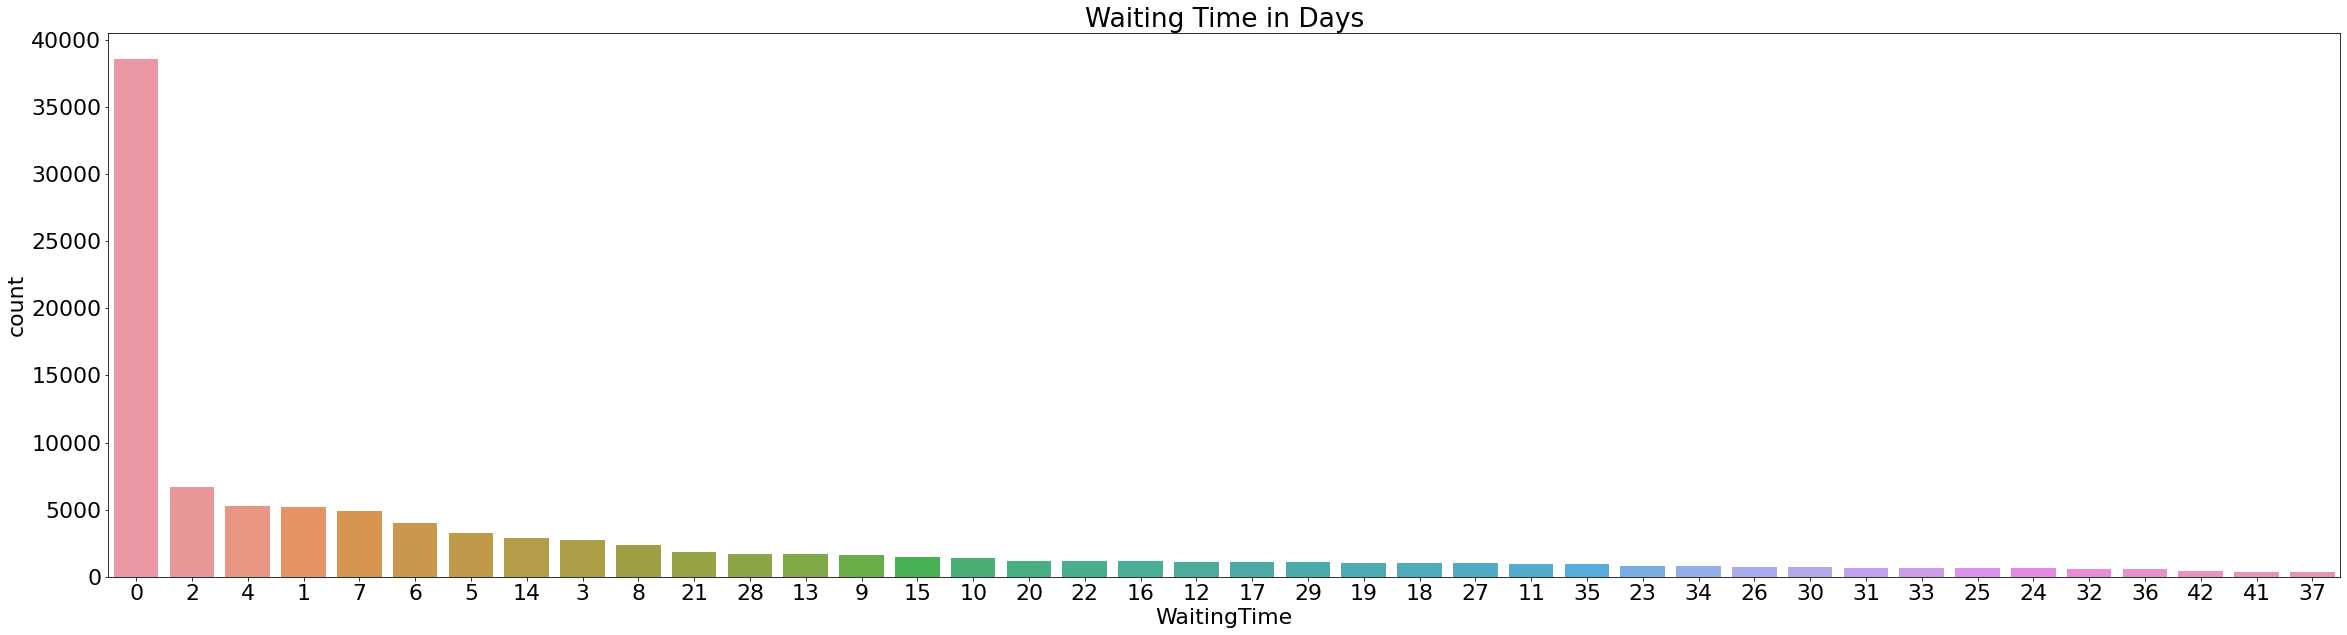

In [30]:
plt.figure(figsize=(40,10))
ax = sns.countplot(x=df.WaitingTime, order=df.WaitingTime.value_counts().iloc[:40].index)
ax.set_title("Waiting Time in Days")
plt.show()


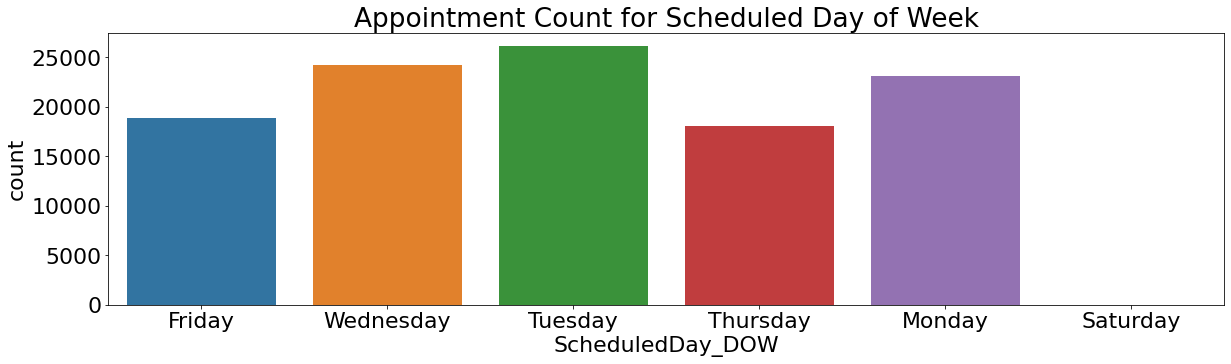

In [31]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=df.ScheduledDay_DOW)
ax.set_title("Appointment Count for Scheduled Day of Week")
plt.show()

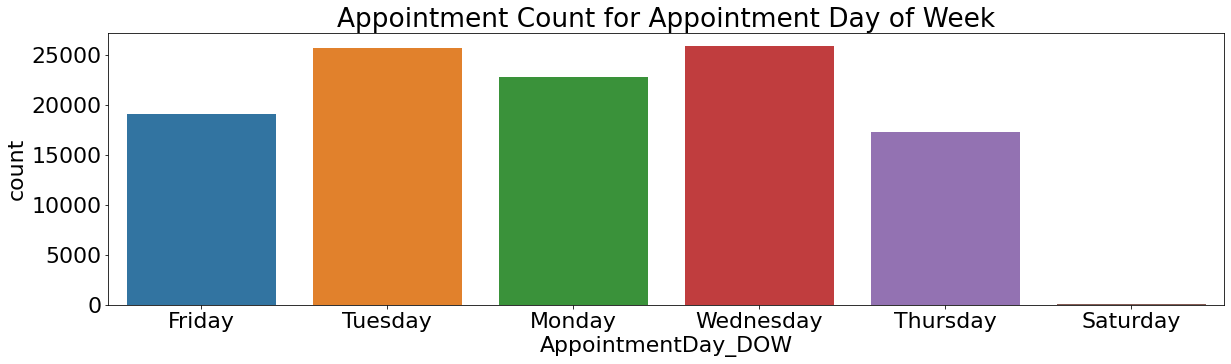

In [32]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=df.AppointmentDay_DOW)
ax.set_title("Appointment Count for Appointment Day of Week")
plt.show()


.Looks like that takes the appointments doesn't work over the weekends as we do not see any appointments taken on Saturday and Sunday.


# Conclusions


Now we can see the factors that affect the absence of the patients more clearly.



.The gender and age are the most important factor as we saw earlier that female and youth show up for their appointment more than male and old people.

.Neighbohood and hypertension come after gender and age as there are some neighborhoods that the diseases are spread and  patients with hypertension tend to show up if they have it or not

.So we need to search for more factors to help patient remmenber their appointments and show up.

.No Limitations in the dataset that null values & missing data and duplicated data are 0
